(-0.6, 1.6, -0.5806049463315992, 1.5095997295175145)

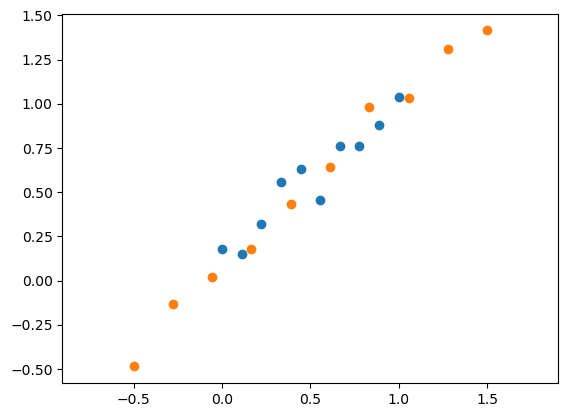

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt


N = 10
np.random.seed(0)
x = np.linspace(0, 1, N)
y = x + 0.1*np.random.randn(x.size)
x_test = np.linspace(-0.5, 1.5, N)
y_test = x_test + 0.1*np.random.randn(x_test.size)
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.axis("equal")

Text(0.5, 1.0, 'Train Err: 0.692, Test Err: 0.744 (Total 1.435)')

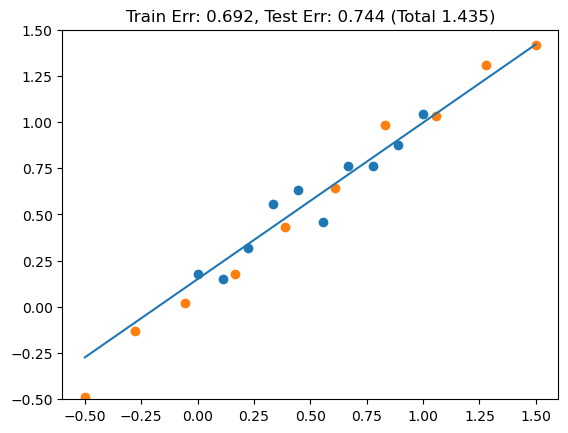

In [9]:
def polyeval(xs, u):
    res = xs[:, None]**(np.arange(u.size)[None, :])
    return np.sum(res*u[None, :], axis=1)

p = 1
A = (x[:, None])**(np.arange(p+1)[None, :])
u = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

x2 = np.linspace(-0.5, 1.5, 100)
y2 = polyeval(x2, u)

plt.plot(x2, y2)
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.ylim([-0.5, 1.5])

train_err = np.sum(np.abs(polyeval(x, u) - y))
test_err = np.sum(np.abs(polyeval(x_test, u) - y_test))
total = train_err + test_err
plt.title("Train Err: {:.3f}, Test Err: {:.3f} (Total {:.3f})".format(train_err, test_err, total))